<a href="https://colab.research.google.com/github/tilopez/GO_distance/blob/master/8_distancias_por_nivel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distancias

## Toolboxes y funciones

In [0]:
# Toolboxes 
!pip install pygsp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting
np.set_printoptions(suppress=True)
import seaborn as sns



# Función para evaluar la matriz de resultados esperados, a partir de las distancias
def exp_matrix( dist, exp ):
  dist = dist.round(8)
  rta = np.zeros(exp.shape)
  [n,m] = exp.shape

  for i in range(n):
    fila_dist = np.concatenate((dist[i,0:i],dist[i,i+1:n]))
    comps = np.zeros(m)
    cont = 0
    for j in range(n-2):
      for k in range(j+1,n-1):
        comps[cont] = 0 if fila_dist[j] < fila_dist[k] else 1 if fila_dist[j] == fila_dist[k] else 2
        cont = cont + 1
    rta[i,:] = comps

  eva = []
  genes = []
  cant = 0

  for i in range(n):
    word = []
    for j in range(m):
      if rta[i,j] == exp[i,j]:
        word.append("right")
      else:      
        word.append("WRONG")
        cant += 1
        
        # determinar los genes que dieron el error
        cont = 0
        for k in range(n-1):
          for l in range(k,n):
            if k != i and l != i and k != l:
              if cont == j:
                genes.append([i+1, k+1, l+1])
              cont += 1

    eva.append(word)

  return(eva,cant,genes)



# Función para crear genes con 0s y 1s 
def labgene(labs,N):
  g = np.zeros(N)
  for i in labs:
    g[i] = 1
  return g



# Función para graficar genes a partir de los índices en el arreglo de genes 
def plot_genes( id_genes ):
  
  for i in range(len(id_genes)):
    id_genes[i] = id_genes[i] - 1

  if len(id_genes)>3:
    size_x = 20
  elif len(id_genes)>2:
    size_x = 15
  else:
    size_x = 10


  fig, ax = plt.subplots(1, len(id_genes), figsize=(size_x,4))
  for i in range(len(id_genes)):
    ax1 = plt.subplot(1, len(id_genes), i+1);
    G.plot_signal(genes[id_genes[i]], ax=ax1, plot_name=id_genes[i]+1)



# Accuracy 
def dist_accu(v1, v2):
  cont = 0
  for i in range(len(v1)):
    if v1[i] == v2[i]:
      cont += 1
  return 1 - cont/len(v1) 



# Funcion para buscar distancias similares con un gen en comun
def sim_dist( gen1, gen2, dist, umbral ):

  gen_sim = []
  dist12 = dist[gen1-1,gen2-1]
  n,_ = dist.shape
  
  for i in range(n):
    if abs(dist[gen1-1,i] - dist12) <= umbral and (i != gen2-1):
      gen_sim.append([gen1,i+1])
  
  return gen_sim

## Grafo y genes

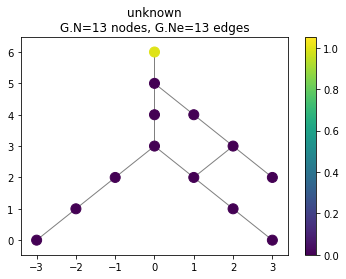

In [0]:
# Definición del grafo 
ini = np.array([0, 1, 1, 2, 3, 4, 4, 5, 5, 6, 7,  9,  10])
fin = np.array([1, 2, 3, 4, 5, 6, 7, 7, 8, 9, 10, 11, 12])

N = fin.max()+1
A = np.zeros((N,N))

for i, f in zip(ini, fin):
    A[i,f] = 1
A = A + A.T

# Matriz de grado
d = np.sum(A,1)
D = np.diag(d)

# Laplaciano
L = D - A

G = graphs.Graph(A)

coords = [[0, 6], [0, 5], [0, 4], [1, 4], [0, 3], [2, 3], [-1, 2], [1, 2], [3, 2], [-2, 1], [2, 1], [-3, 0], [3, 0]]
G.set_coordinates(coords)

G.plot_signal(np.concatenate(([1],[0]*12)))

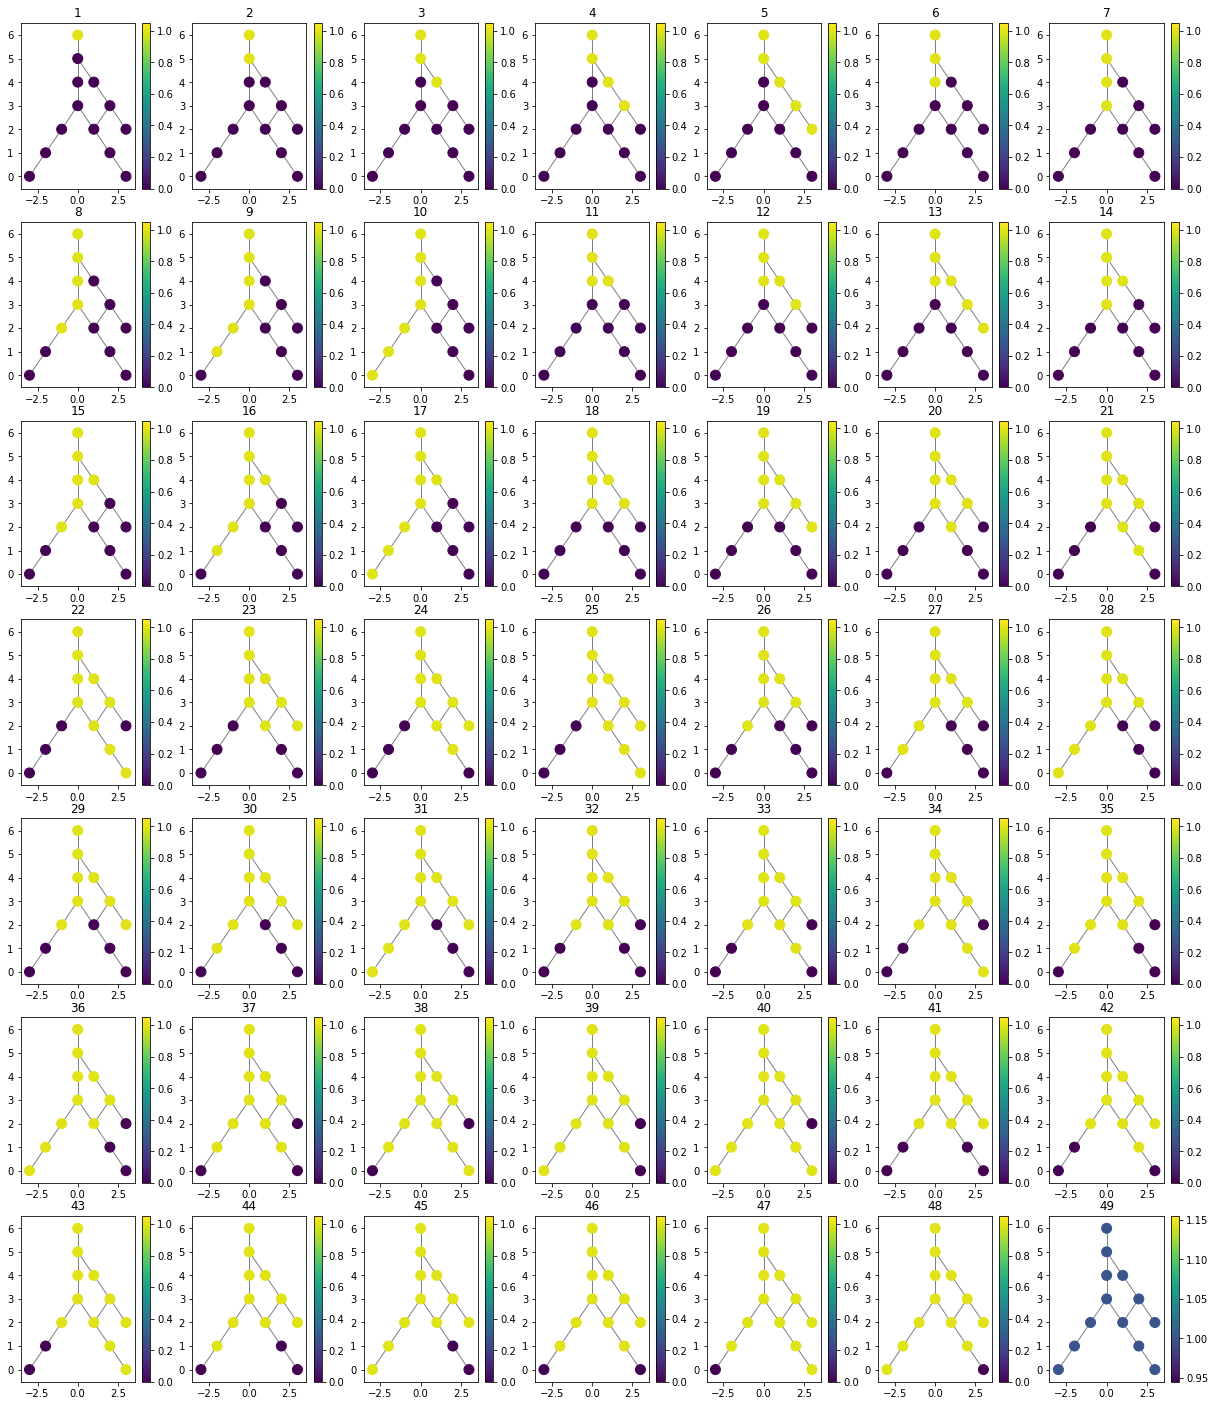

In [0]:
# Primera generación 
genes = []

genes.append(labgene([0],N))
genes.append(labgene([0,1],N))
genes.append(labgene([0,1,2],N))
genes.append(labgene([0,1,2,4],N))
genes.append(labgene([0,1,2,4,6],N))
genes.append(labgene([0,1,2,4,6,9],N))
genes.append(labgene([0,1,2,4,6,9,11],N))

genes.append(labgene([0,1,2,3,4,5,7],N))
genes.append(labgene([0,1,2,3,4,5,7,10],N))
genes.append(labgene([0,1,2,3,4,5,7,10,12],N))

genes.append(labgene([0,1,3],N))
genes.append(labgene([0,1,3,5],N))
genes.append(labgene([0,1,3,5,8],N))



# Segunda generación
generacion_2 = []
for i in genes:
  for j in genes:
    generacion_2.append(np.logical_or(i,j).astype(int))

generacion_2 = np.unique(generacion_2,axis=0)

genes = np.concatenate((genes,generacion_2))

genes = np.unique(genes,axis=0)



# Tercera generación
generacion_3 = []
for i in genes:
  for j in generacion_2:
    generacion_3.append(np.logical_or(i,j).astype(int))

generacion_3 = np.unique(generacion_3,axis=0)

genes = np.concatenate((genes,generacion_3))

genes = np.unique(genes,axis=0)

n = len(genes) 



# Gráficas genes
plotting.BACKEND = 'matplotlib'
fig, ax = plt.subplots(7, 7, figsize=(21,25))

for i in range(len(genes)):
    ax1 = plt.subplot(7, 7, i+1 % 7)
    G.plot_signal(genes[i], ax=ax1, plot_name=str(i+1)) 

## Diccionarios y base

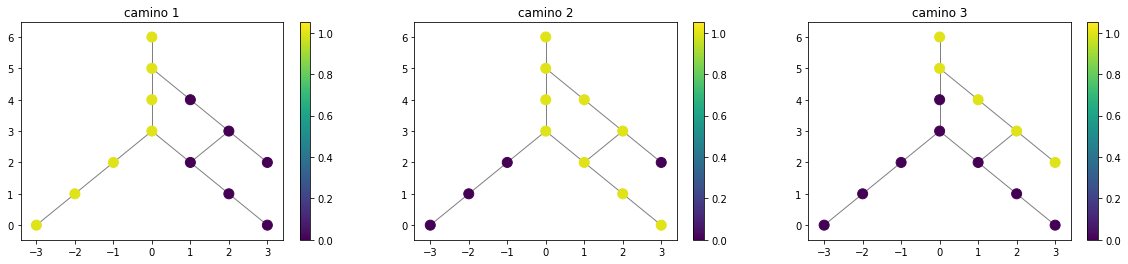

In [0]:
# Diccionario de un elemento por hoja
d1_camino1 = labgene([0,1,2,4,6,9,11],N)
d1_camino2 = labgene([0,1,2,3,4,5,7,10,12],N)
d1_camino3 = labgene([0,1,3,5,8],N)

plotting.BACKEND = 'matplotlib'
fig, ax = plt.subplots(1, 3, figsize=(20,4))

ax1 = plt.subplot(1, 3, 1);     G.plot_signal(d1_camino1, ax=ax1, plot_name="camino 1")
ax1 = plt.subplot(1, 3, 2);     G.plot_signal(d1_camino2, ax=ax1, plot_name="camino 2")
ax1 = plt.subplot(1, 3, 3);     G.plot_signal(d1_camino3, ax=ax1, plot_name="camino 3")

D1 = np.column_stack((d1_camino1, d1_camino2, d1_camino3)).T

d1=np.sum(D1.T,axis=0)
idx1=np.argsort(d1)
D1=D1[idx1,:]

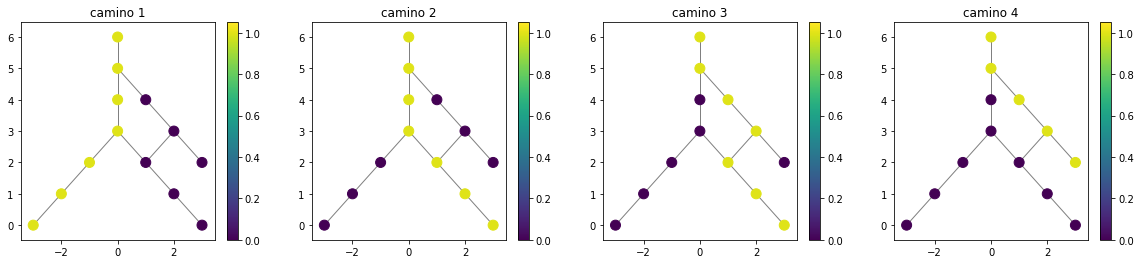

In [0]:
# Diccionarios de todos los caminos a las hojas
d2_camino1 = labgene([0,1,2,4,6,9,11],N)
d2_camino2 = labgene([0,1,2,4,7,10,12],N)
d2_camino3 = labgene([0,1,3,5,7,10,12],N)
d2_camino4 = labgene([0,1,3,5,8],N)

plotting.BACKEND = 'matplotlib'
fig, ax = plt.subplots(1, 4, figsize=(20,4))

ax1 = plt.subplot(1, 4, 1);     G.plot_signal(d2_camino1, ax=ax1, plot_name="camino 1")
ax1 = plt.subplot(1, 4, 2);     G.plot_signal(d2_camino2, ax=ax1, plot_name="camino 2")
ax1 = plt.subplot(1, 4, 3);     G.plot_signal(d2_camino3, ax=ax1, plot_name="camino 3")
ax1 = plt.subplot(1, 4, 4);     G.plot_signal(d2_camino4, ax=ax1, plot_name="camino 4")

D2 = np.column_stack((d2_camino1, d2_camino2, d2_camino3, d2_camino4)).T

d2=np.sum(D2.T,axis=0)
idx2=np.argsort(d2)
D2=D2[idx2,:]

In [0]:
# Base del laplaciano
autoval, autovec = np.linalg.eigh(L)
idx = autoval.argsort()
val = autoval[idx]
B = autovec[:,idx]

## Calcular las distancias

In [0]:
# Definir si se muestran las distancias 
mostrar_distancias = 0

# Cálculo de las distancias 
dist_D1 = np.zeros((n,n))
dist_D2 = np.zeros((n,n))
dist_B = np.zeros((n,n,13))
dist_A = np.zeros((n,n))
genes = np.column_stack(genes).T

ggf1 = np.dot(D1, genes.T).T
for i in range(n):
  for j in range(i,n):
    dist_D1[i,j] = np.linalg.norm(ggf1[i,:]-ggf1[j,:])
dist_D1 = dist_D1 + dist_D1.T

ggf2 = np.dot(D2, genes.T).T
for i in range(n):
  for j in range(i,n):
    dist_D2[i,j] = np.linalg.norm(ggf2[i,:]-ggf2[j,:])
dist_D2 = dist_D2 + dist_D2.T

# el laplaciano va transpuesto
for k in range(13):
  ggf = np.dot(B[:,-13+k:].T, genes.T).T
  for i in range(n):
    for j in range(i,n):
      dist_B[i,j,k] = np.linalg.norm(ggf[i,:]-ggf[j,:])
  dist_B[:,:,k] = dist_B[:,:,k] + dist_B[:,:,k].T

# accuracy
for i in range(n):
  for j in range(i,n):
    dist_A[i,j] = dist_accu(genes[i], genes[j])
dist_A = dist_A + dist_A.T

if mostrar_distancias == 1:
  noms = []
  for i in range(n):
    noms.append(strgen.join(str(i+1)))

  print("\n Caminos únicos a las hojas")
  frame1 = pd.DataFrame(dist_D1, noms, noms)
  print(frame1) 

  print("\n Todos los caminos posibles a las hojas")
  frame2 = pd.DataFrame(dist_D2, noms, noms)
  print(frame2)

  print("\n Laplaciano")
  frame3 = pd.DataFrame(dist_B, noms, noms)
  print(frame3)

  print("\n Accuracy")
  frame4 = pd.DataFrame(dist_A, noms, noms)
  print(frame4) 

In [0]:
# Normalizar las distancias 
gen0 = np.zeros((13,1))
gen1 = np.ones((13,1))

ggf1_0 = np.dot(D1,gen0)
ggf1_1 = np.dot(D1,gen1)
dist_max_D1 = np.linalg.norm(ggf1_0-ggf1_1)

ggf2_0 = np.dot(D2,gen0)
ggf2_1 = np.dot(D2,gen1)
dist_max_D2 = np.linalg.norm(ggf2_0-ggf2_1)

dist_max_B = 13 #sum(sum(np.power(B,2)))

# distancias normalizadas
n_dist_D1 = dist_D1/dist_max_D1
n_dist_D2 = dist_D2/dist_max_D2
n_dist_B = dist_B/dist_max_B
n_dist_A = dist_A

# Comparación de distancias en casos con un nodo de diferencia

In [0]:
# Distancia para los errores de 1 etiqueta
dist_1_err = n_dist_A[0,1] # inicializado con los primeros dos genes que tienen una etiqueta de diferencia

genes_1_err = np.matrix([0,1]) # Matriz con los pares de genes que tienen un error
for i in range(1,n):
  for j in range(i,n):
    if n_dist_A[i,j] == dist_1_err:
      genes_1_err = np.append(genes_1_err, np.matrix([i,j]), axis=0)

In [0]:
# Niveles de los errores
lvls = [0, 1, 2, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6] # Nivel por posicion en el gen

lvl_1_err = []
cant_errores = np.shape(genes_1_err)[0]
for i in range(cant_errores):
  gen1 = genes[genes_1_err[i,0]]
  gen2 = genes[genes_1_err[i,1]]
  for j in range(13):
    if gen1[j] != gen2[j]:
      lvl_1_err.append(lvls[j])
      break

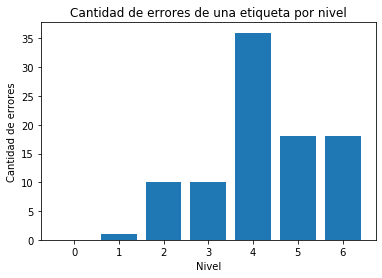

In [0]:
# Grafica del nivel de los errores contra la cantidad total de errores en ese nivel
cant_err_x_lvl = []
for i in range(7):
  cant_err_x_lvl.append(lvl_1_err.count(i))

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(np.arange(7), cant_err_x_lvl)
ax.set_title('Cantidad de errores de una etiqueta por nivel')
ax.set_xlabel('Nivel')
ax.set_ylabel('Cantidad de errores')
plt.show()

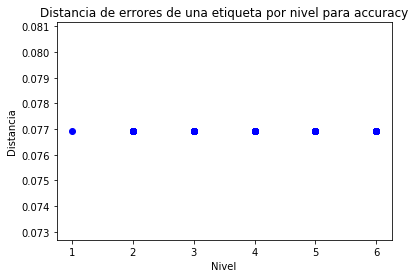

In [0]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title('Distancia de errores de una etiqueta por nivel para accuracy')
ax.set_xlabel('Nivel')
ax.set_ylabel('Distancia')

for i in range(cant_errores):
  ax.plot(lvl_1_err[i],n_dist_A[genes_1_err[i,0],genes_1_err[i,1]],'bo')
plt.show()

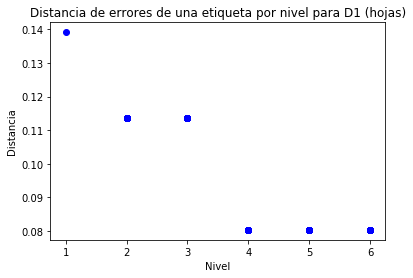

In [0]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title('Distancia de errores de una etiqueta por nivel para D1 (hojas)')
ax.set_xlabel('Nivel')
ax.set_ylabel('Distancia')

for i in range(cant_errores):
  ax.plot(lvl_1_err[i],n_dist_D1[genes_1_err[i,0],genes_1_err[i,1]],'bo')
plt.show()

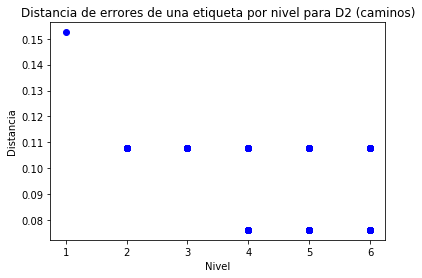

In [0]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title('Distancia de errores de una etiqueta por nivel para D2 (caminos)')
ax.set_xlabel('Nivel')
ax.set_ylabel('Distancia')

for i in range(cant_errores):
  ax.plot(lvl_1_err[i],n_dist_D2[genes_1_err[i,0],genes_1_err[i,1]],'bo')
plt.show()

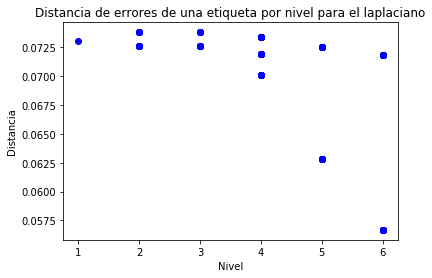

In [0]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title('Distancia de errores de una etiqueta por nivel para el laplaciano')
ax.set_xlabel('Nivel')
ax.set_ylabel('Distancia')

for i in range(cant_errores):
  ax.plot(lvl_1_err[i],n_dist_B[genes_1_err[i,0],genes_1_err[i,1],2],'bo')
plt.show()

# Función

In [0]:
def dist_lvl(cant_err):

  # lista de genes que tienen n etiquetas de error con el gen 1
  # referencia para sacar la distancia entre genes con n errores
  genes_iniciales = [1, 2, 3, 4, 8, 9, 16, 21, 24, 37, 39, 48]

  # distancia a buscar para obtener los errores
  dist_err = n_dist_A[0,genes_iniciales[cant_err-1]]

  # matriz con los pares de genes
  genes_err = np.matrix([0,genes_iniciales[cant_err-1]])
  
  for i in range(1,n):
    for j in range(i,n):
      if n_dist_A[i,j] == dist_err:
        genes_err = np.append(genes_err, np.matrix([i,j]), axis=0)
  genes_err = np.unique(genes_err, axis=0)
  
  # determinar los niveles de error
  # en el caso de mas de un error se una el promedio rendondeado
  # es mas que nada para tener informacion de todos los genes que intervienen
  lvls = [0, 1, 2, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6] # niveles de los errores en cada posicion del gen
  cant_errores = np.shape(genes_err)[0]
  lvl_err = [0] * cant_errores
  for i in range(cant_errores):
    gen1 = genes[genes_err[i,0]]
    gen2 = genes[genes_err[i,1]]
    for j in range(13):
      if gen1[j] != gen2[j]:
        lvl_err[i] += lvls[j]
    lvl_err[i] = round(lvl_err[i]/cant_err)

  # grafica de la cantidad de errores por "nivel"
  cant_err_x_lvl = []
  for i in range(7):
    cant_err_x_lvl.append(lvl_err.count(i))

  fig, ax = plt.subplots(3,3,figsize=(20,16))
  ax[0,0].bar(np.arange(7), cant_err_x_lvl)
  ax[0,0].set_title('Cantidad de errores por "nivel"')
  ax[0,0].set_xlabel('"Nivel"')
  ax[0,0].set_ylabel('Cantidad de errores')

  #fig, axs = plt.subplots(2, 2, figsize=(12,10))
  #axs[0,0].set_title('Distancia de errores para accuracy')
  #axs[0,0].set_xlabel('"Nivel"')
  #axs[0,0].set_ylabel('Distancia')
  #for i in range(cant_errores):
  #  axs[0,0].plot(lvl_err[i],n_dist_A[genes_err[i,0],genes_err[i,1]],'bo')

  sets_A =  [[], [], [], [], [], [], []]
  sets_D1 =  [[], [], [], [], [], [], []]
  sets_D2 =  [[], [], [], [], [], [], []]
  sets_B11 =  [[], [], [], [], [], [], []]
  sets_B10 =  [[], [], [], [], [], [], []]
  sets_B9 =  [[], [], [], [], [], [], []]
  sets_B8 =  [[], [], [], [], [], [], []]
  sets_B7 =  [[], [], [], [], [], [], []]

  for i in range(cant_errores):
    sets_A[lvl_err[i]].append(n_dist_A[genes_err[i,0],genes_err[i,1]])
    sets_D1[lvl_err[i]].append(n_dist_D1[genes_err[i,0],genes_err[i,1]])
    sets_D2[lvl_err[i]].append(n_dist_D2[genes_err[i,0],genes_err[i,1]])
    sets_B11[lvl_err[i]].append(n_dist_B[genes_err[i,0],genes_err[i,1],2])
    sets_B10[lvl_err[i]].append(n_dist_B[genes_err[i,0],genes_err[i,1],3])
    sets_B9[lvl_err[i]].append(n_dist_B[genes_err[i,0],genes_err[i,1],4])
    sets_B8[lvl_err[i]].append(n_dist_B[genes_err[i,0],genes_err[i,1],5])
    sets_B7[lvl_err[i]].append(n_dist_B[genes_err[i,0],genes_err[i,1],6])

  ax[0,1].set_title('Distancia de errores para accuracy')
  ax[0,1].set_xlabel('"Nivel"')
  ax[0,1].set_ylabel('Distancia')
  ax[0,1].grid()
  sns.swarmplot(data=sets_A, ax=ax[0,1])

  ax[0,2].set_title('Distancia de errores para D1 (hojas)')
  ax[0,2].set_xlabel('"Nivel"')
  ax[0,2].set_ylabel('Distancia')
  ax[0,2].grid()
  sns.swarmplot(data=sets_D1, ax=ax[0,2])

  ax[1,0].set_title('Distancia de errores para D2 (caminos)')
  ax[1,0].set_xlabel('"Nivel"')
  ax[1,0].set_ylabel('Distancia')
  ax[1,0].grid()
  sns.swarmplot(data=sets_D2, ax=ax[1,0])

  ax[1,1].set_title('Distancia de errores para lap 11')
  ax[1,1].set_xlabel('"Nivel"')
  ax[1,1].set_ylabel('Distancia')
  ax[1,1].grid()
  sns.swarmplot(data=sets_B11, ax=ax[1,1])

  ax[1,2].set_title('Distancia de errores para lap 10')
  ax[1,2].set_xlabel('"Nivel"')
  ax[1,2].set_ylabel('Distancia')
  ax[1,2].grid()
  sns.swarmplot(data=sets_B10, ax=ax[1,2])

  ax[2,0].set_title('Distancia de errores para lap 9')
  ax[2,0].set_xlabel('"Nivel"')
  ax[2,0].set_ylabel('Distancia')
  ax[2,0].grid()
  sns.swarmplot(data=sets_B9, ax=ax[2,0])
  ax[2,1].set_title('Distancia de errores para lap 8')
  ax[2,1].set_xlabel('"Nivel"')
  ax[2,1].set_ylabel('Distancia')
  ax[2,1].grid()
  sns.swarmplot(data=sets_B8, ax=ax[2,1])

  ax[2,2].set_title('Distancia de errores para lap 7')
  ax[2,2].set_xlabel('"Nivel"')
  ax[2,2].set_ylabel('Distancia')
  ax[2,2].grid()
  sns.swarmplot(data=sets_B7, ax=ax[2,2])

  return

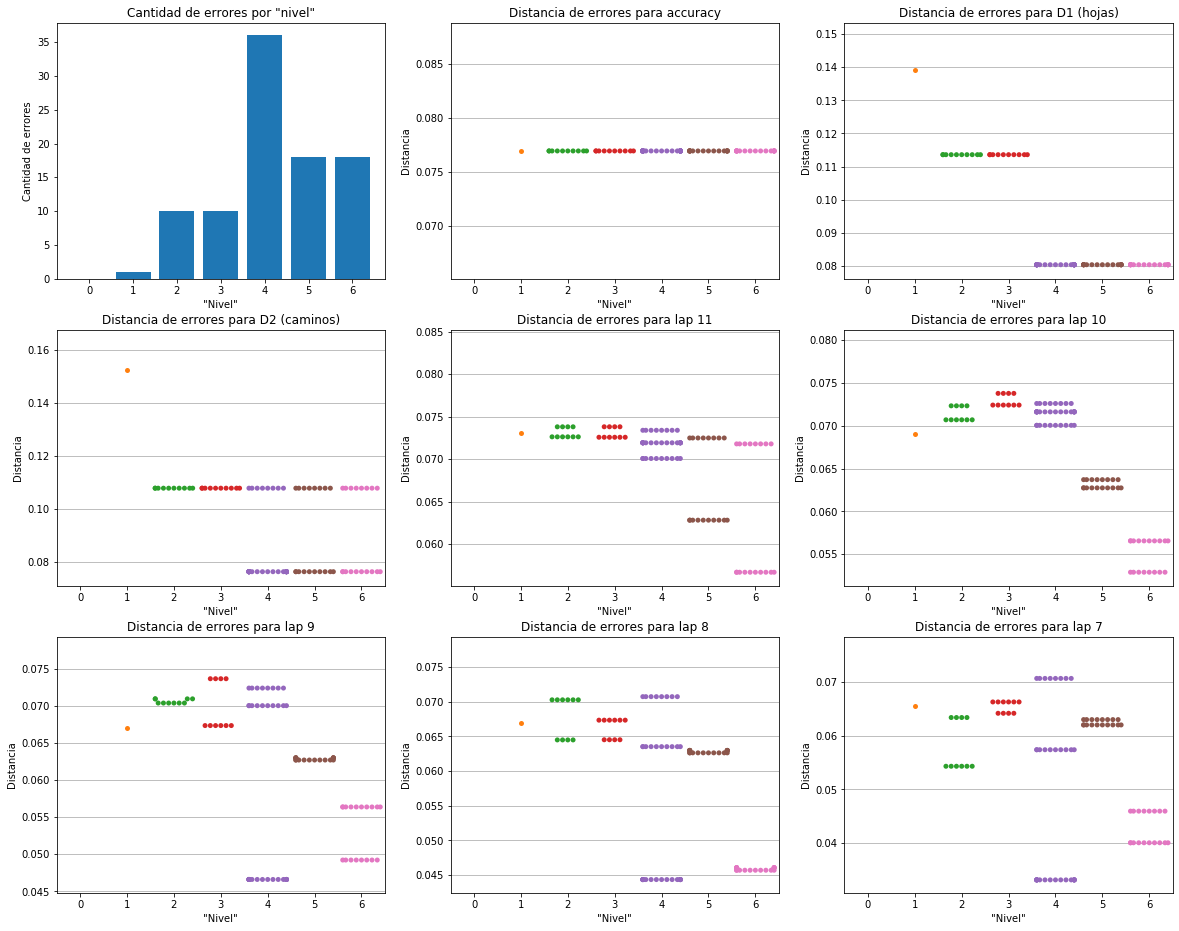

In [0]:
dist_lvl(1)

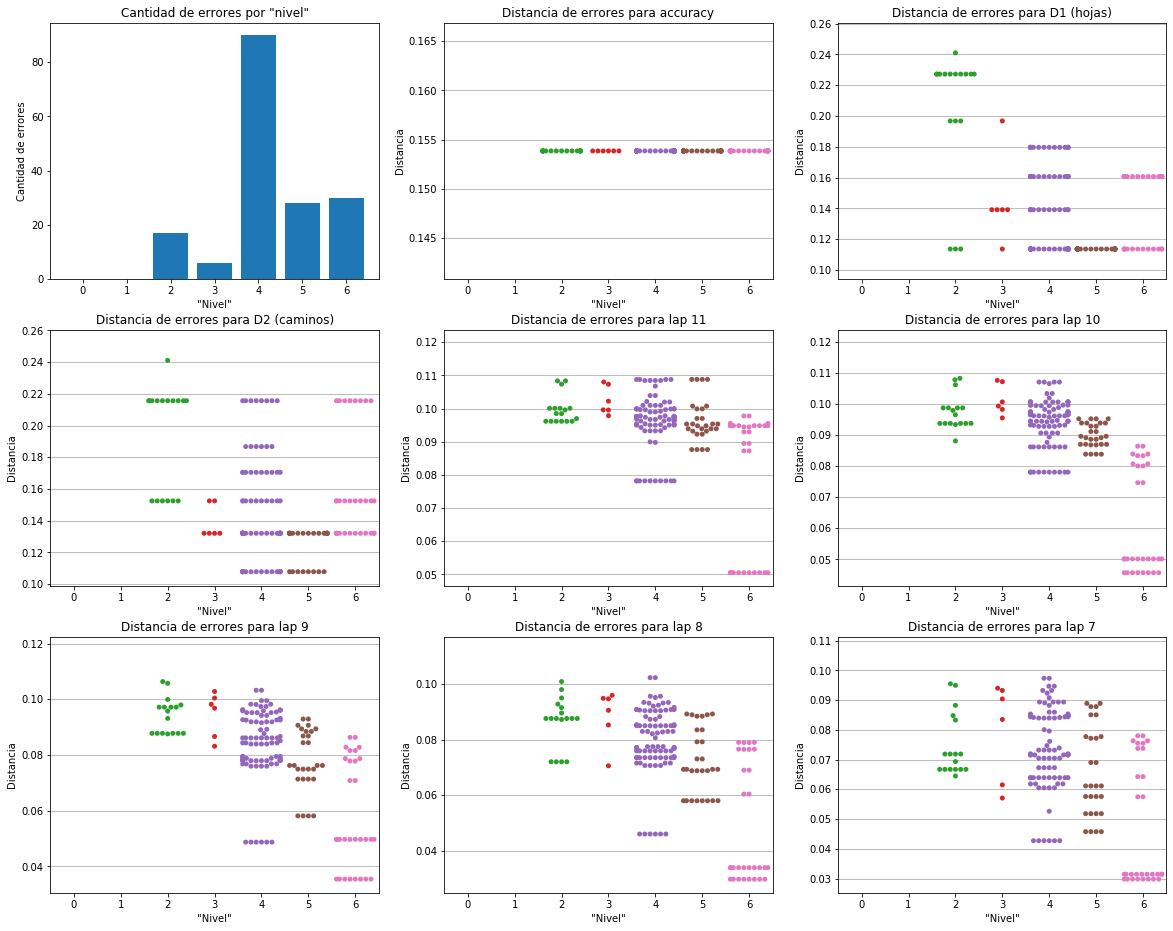

In [0]:
dist_lvl(2)